# Linear Regression in Python

This notebook shows how to build a Linear regression model from scratch.

In [1]:
#%% Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

#%% Setting random seed
np.random.seed(10)

In [2]:
# Generate Random data
x = np.random.randn(100,1)

# Generate random noise [same shape as input]
noise = np.random.randn(100,1)

# Generate true outputs
# ( y = mx + c)
y_true = 3 * x + 2 + 0.5 * noise 

We generated the target values by using a slope '3' and intercept '2'.

By doing linear regression we expect to train our model to reach these values in order to correctly model this line.

In [3]:
#Training and Validation split
shuffle_idx = np.random.permutation(x.size)

x_train, y_train = x[shuffle_idx[:80]], y_true[shuffle_idx[:80]]
x_valid, y_valid = x[shuffle_idx[80:]], y_true[shuffle_idx[80:]] 

Our Data is ready. 

Now we have to build a model to implement Linear Regression. We use Gradient descent algorithm to optimize the model.

In [4]:
class LinearRegressionwithGD():
    """
    Linear Regression class
    """
    def __init__(self, slope, intercept, lr):
        self.slope = slope
        self.intercept = intercept
        self.lr = lr
        self.train = True
        
    def predict(self, data):
        """ 
        Predicts output given input data
        """
        out = np.dot(data,self.slope) + self.intercept
        self.d = data
        return out
    
    def MSEloss(self,predicted, true):
        """
        Calculates MSE loss and also calculates gradients of slope, intercept
        """
        error = predicted - true
        loss = (error**2).mean()
        
        if self.train == True:
            # Gradients calculated only during training
            self.slope_grad =  2 * (self.d * error).mean()
            self.intercept_grad = 2 * error.mean()
        
        return loss
    
    def set_mode(self, mode):
        """
        Sets the mode of the model
        if 'train' : Gradients are calculated
        if 'eval' : Gradients are ignored
        """
        if mode == 'train':
            self.train = True
        elif mode == 'eval':
            self.train = False
        
    def update(self):
        """
        Updates parameters and makes gradients zero after update
        """
        self.slope -= self.lr * self.slope_grad
        self.intercept -= self.lr * self.intercept_grad
        
        self.slope_grad = 0
        self.intercept_grad = 0

Now that we are ready with the model, we can initiate the initial slope and intercept for our model. Here I used numpy to generate random values to initiate the model.

In [5]:
#%% Initiate model
slope = np.random.rand(1,1)
intercept = np.random.rand(1,1)

model = LinearRegressionwithGD(slope= slope,intercept= intercept, lr= 0.01)

In [6]:
print('Before Training ')
print('Slope : ', model.slope)
print('Intercept : ', model.intercept)

Before Training 
Slope :  [[0.52885388]]
Intercept :  [[0.69630827]]


Now we train the model for desired number of cycles. 

Each cycle should have three steps to correctly train the model:
1. predict
2. calculate loss
3. update

In [7]:
#%% Start training
losses = np.array([])

model.set_mode('train')

for i in range(1000):

    y_pred = model.predict(x_train)

    loss = model.MSEloss(y_pred, y_train)
    losses = np.append(losses, loss)

    model.update()

    if i % 100 == 0:
        print('Epoch : {:d}, Loss : {:.4f}'.format(i,loss))

Epoch : 0, Loss : 7.2473
Epoch : 100, Loss : 0.4296
Epoch : 200, Loss : 0.2409
Epoch : 300, Loss : 0.2342
Epoch : 400, Loss : 0.2340
Epoch : 500, Loss : 0.2339
Epoch : 600, Loss : 0.2339
Epoch : 700, Loss : 0.2339
Epoch : 800, Loss : 0.2339
Epoch : 900, Loss : 0.2339


In [8]:
print('\nAfter Training ')
print('Slope : ', model.slope)
print('Intercept : ', model.intercept)


After Training 
Slope :  [[2.97957634]]
Intercept :  [[2.02758384]]


The actual values we used to generate the line are 
Slope : 3
intercept : 2

As we can see after running the model for 1000 epochs, the model learnt these values.

In [23]:
#%% Test performance of model

model.set_mode('eval')

y = model.predict(x_valid)
model_error = model.MSEloss(y, y_valid)

print('\nLoss on Validation set : {:.4f}'.format(loss))


Loss on Validation set : 0.2865


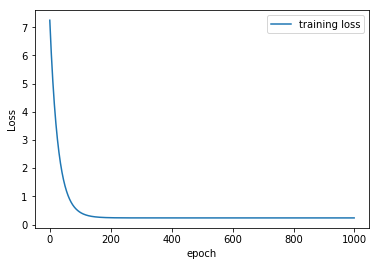

In [10]:
# Loss
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(111)
ax.plot(range(losses.size),losses, label = 'training loss')
ax.set_xlabel('epoch')
ax.set_ylabel('Loss')
ax.legend(loc = 'best')

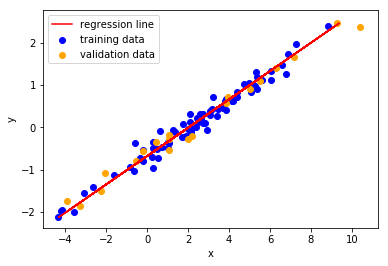

In [11]:
# Regression Line
y_plot = model.predict(x)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.scatter(y_train, x_train, c = 'blue', label = 'training data')
ax.scatter(y_valid, x_valid, c ='orange', label = 'validation data')
ax.plot(y_plot ,x, c = 'red',label = 'regression line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc = 'best')

The results are compared with Linear Regression model from sklearn.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
sk_model = LinearRegression()

In [14]:
sk_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print('After fitting the model to training data')
print('Slope : ',sk_model.coef_)
print('Intercept : ',sk_model.intercept_)

After fitting the model to training data
Slope :  [[2.9795767]]
Intercept :  [2.02758372]


#### The model developed and the model created using sklearn almost perform similarly.

In [17]:
y_sk = sk_model.predict(x_valid)

In [19]:
from sklearn.metrics import mean_squared_error

In [22]:
sk_model_error = mean_squared_error(y_valid, y_sk)
print(sk_model_error)

0.2865071877492776


In [24]:
print('Error obtained with Developed model : ', model_error)
print('Error obtained with Sk Learn Model :', sk_model_error)

Error obtained with Developed model :  0.2865073617504898
Error obtained with Sk Learn Model : 0.2865071877492776
